# Load Iris Data

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
print(f"features: ",  str(data['feature_names']), "\n"
        f"targets: ",  str(data['target_names']))

features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
targets:  ['setosa' 'versicolor' 'virginica']


# Setup Keras with Feedforward

In [8]:
import numpy as np
import keras
from keras import layers
from keras import ops

model_normalization = keras.Sequential(
    [
        layers.Input(shape=(len(data['feature_names']),)),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(len(data['target_names'])),
    ],
    name="iris_model_normalized"
)

model_no_normalization = keras.Sequential(
    [
        layers.Input(shape=(len(data['feature_names']),)),
        layers.Dense(128, activation="relu"),
        layers.Dense(len(data['target_names'])),
    ],
    name="iris_model_no_normalization",
)

def train_evaluate(features, model, targets):
    optimizer = keras.optimizers.RMSprop()
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizer,
        metrics=["accuracy"])
    history=model.fit(features, targets, batch_size=10, epochs=50, validation_split=0.2)
    scoring = model.evaluate(features, targets, verbose=2)
    return scoring, history

In [9]:
models = [model_normalization, model_no_normalization]
scores = {}
histories = {}
for model in models:
    print(f"Training with {model.name} model")
    score_result,history_result=train_evaluate(data['data'], model, data['target'])
    scores[model.name] = score_result
    histories[model.name] = history_result

Training with iris_model_normalized model
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5750 - loss: 1.1176 - val_accuracy: 1.0000 - val_loss: 0.8683
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.4400 - val_accuracy: 1.0000 - val_loss: 0.5788
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.2837 - val_accuracy: 1.0000 - val_loss: 0.6031
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9333 - loss: 0.2793 - val_accuracy: 1.0000 - val_loss: 0.5170
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9500 - loss: 0.1956 - val_accuracy: 1.0000 - val_loss: 0.4829
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9750 - loss: 0.1780 - val_accuracy: 1.0000 - val_loss: 0.4293
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9417 - loss: 0.1721 - val_accuracy: 1.0000 - val_loss: 0.5242
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9917 - loss

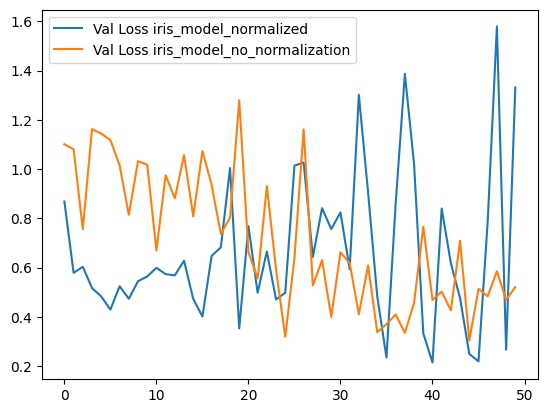

In [10]:
import matplotlib.pyplot as plt
for opt_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Val Loss {opt_name}')
plt.legend()
plt.show()

In [11]:
# Final Performance
for model_name, score in scores.items():
    print(f"Final evaluation with {model_name} model: {score[1]*100:.2f}% accuracy")

Final evaluation with iris_model_normalized model: 84.67% accuracy
Final evaluation with iris_model_no_normalization model: 92.67% accuracy


# Commentary

The results above with the Iris dataset are pretty interesting - convergence is almost immediate with normalization and it looks like there is less variance in performance as well. However, the final accuracy is higher with the normalization. Given what that training graph looks like, I'd suspect that result is quite unstable and could flip dramatically given a different stopping point (less or more epochs or just multiple runs). Also, if I had split into training and test sets, I think you might see some differences in generalization ability (the unnormalized model might just be overfitting the training set), given that batch normalization acts as a regularization technique as well.